# Red Wine Quality Prediction

# Problem Statement:

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

# Attribute Information

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

In this dataset i am going to make a model to determine which physiochemical prperties make a good mine.

# Importing Important Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Loadind the Data

In [3]:
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Data at a glance, as we can see our target variable is "Quality" and as per observation i can use classification method to make model for this dataset.

# Data Cleaning and Checking

On this section we will check for undesired values such as NaN and get our dataset prepared so we can train our model later on with proper data. We will also check data types so we can transform them into numerical values if needed.

In [4]:
data.shape

(1599, 12)

In [5]:
data.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
# getting infirmation of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


since there are no object datatypes that must be converted to numerical values.

In [7]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

As here we can observe there are no null values in this dataset.

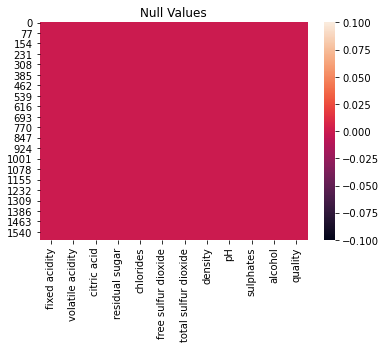

In [8]:
sns.heatmap(data.isnull())
plt.title("Null Values")
plt.show()

# Statistical Summary

In [9]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Data Exploration

After checking our dataset is fine and "ready to go" i am going to explore the data a little bit more, i am going to plot important information that will help me check how features behave and how they are correlated. i will also try to extract as much information as i can from it to help me understand the dataset better.

Knowing our target variable is "quality", we are now going to plot some information about it. Let's see which values this column contains and how many of them there are.

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


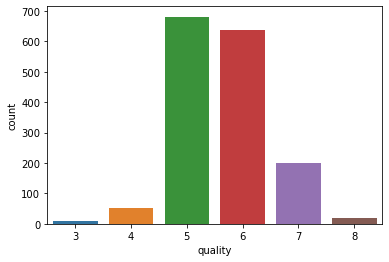

In [10]:
print(data.quality.value_counts())
sns.countplot(data['quality'])


Now that i got information about target variable i am going to study the correlation between quality and other features and see which are the ones that play an important role in deciding the quality of a wine.

In [11]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [12]:
correlations = data.corr()['quality'].sort_values(ascending=False)
print(correlations)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


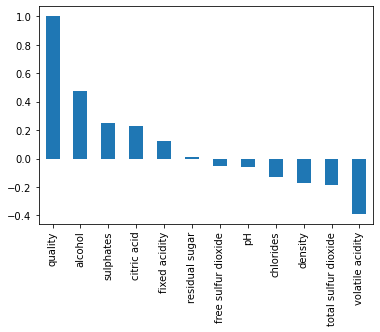

In [13]:
correlations.plot(kind='bar')

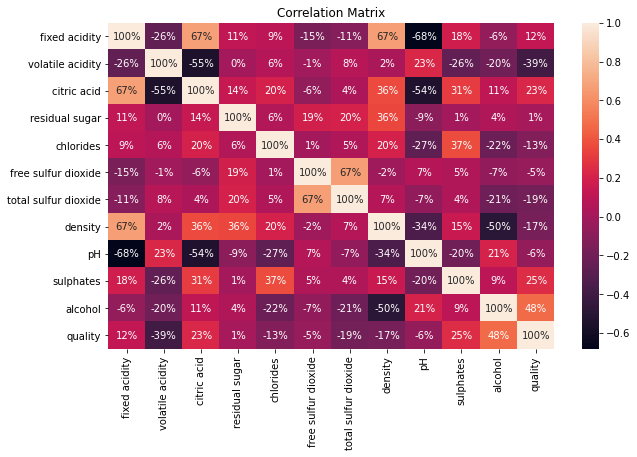

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, fmt='.0%')
plt.title('Correlation Matrix')
plt.show()

Here we observe in the above correlations matrix that approximately half of these features correlate positevely with target variable (quality) and the half of others crrelate negatively.

In [15]:
print(abs(correlations)>0.2)

quality                  True
alcohol                  True
sulphates                True
citric acid              True
fixed acidity           False
residual sugar          False
free sulfur dioxide     False
pH                      False
chlorides               False
density                 False
total sulfur dioxide    False
volatile acidity         True
Name: quality, dtype: bool


From all the values, we are selecting alcohol, sulphates, citric acid and volatile acidity in order to study them better and see the distribution of values that separate the different qualities.

# Data Visualization and plotting to know how the data columns are distributed and related  with target variable in the dataset.

Alcohol

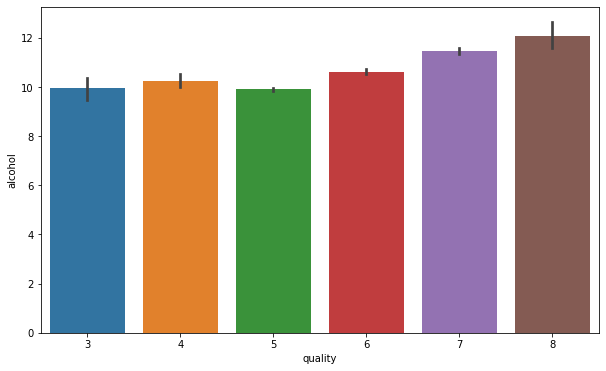

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = data)

Text(0, 0.5, 'Alcohol')

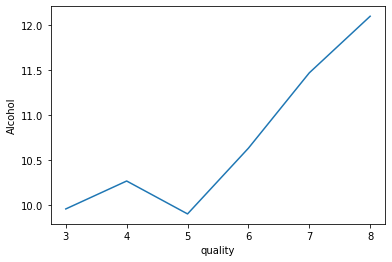

In [17]:
data.groupby('quality')['alcohol'].mean().plot.line()
plt.ylabel("Alcohol")

Text(0.5, 1.0, 'Alcohol Percent in Different Quality Wines')

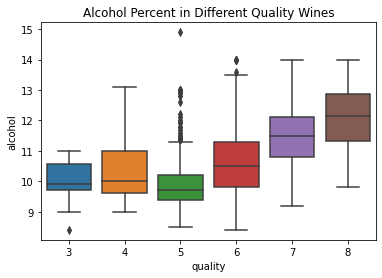

In [18]:
sns.boxplot(x='quality',y='alcohol', data=data)
plt.title("Alcohol Percent in Different Quality Wines")

Sulphate

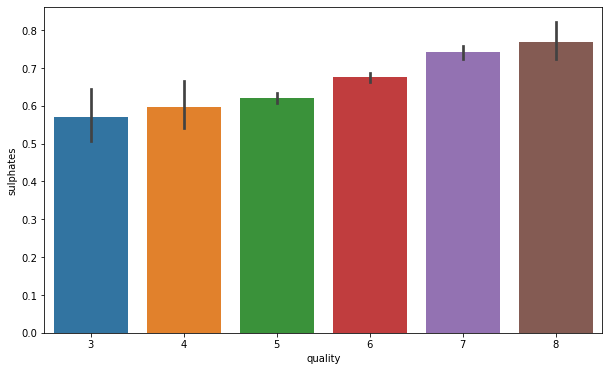

In [19]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = data)

Text(0, 0.5, 'Sulhates')

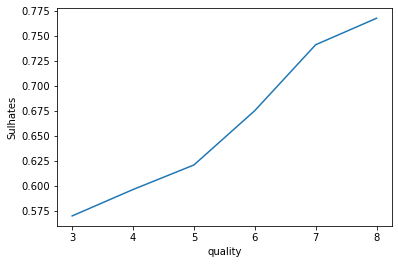

In [20]:
data.groupby('quality')['sulphates'].mean().plot.line()
plt.ylabel("Sulhates")

Text(0.5, 1.0, 'Sulphate Percent in Different Quality Wines')

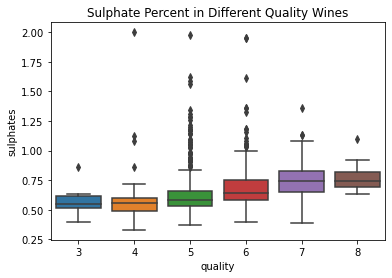

In [21]:
sns.boxplot(x='quality',y='sulphates', data=data)
plt.title("Sulphate Percent in Different Quality Wines")

Citic Acid

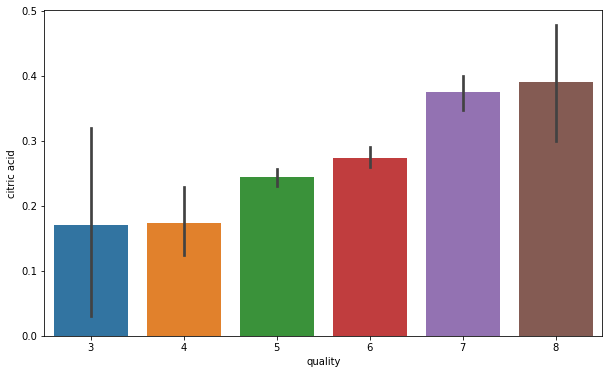

In [22]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = data)

Text(0, 0.5, 'Citric Acid')

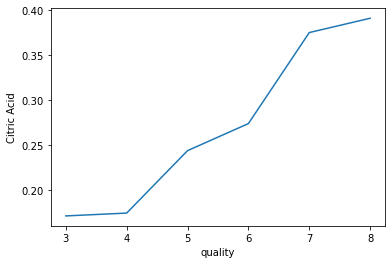

In [23]:
data.groupby('quality')['citric acid'].mean().plot.line()
plt.ylabel("Citric Acid")

Text(0.5, 1.0, 'Citric Acid Percent in Different Quality Wines')

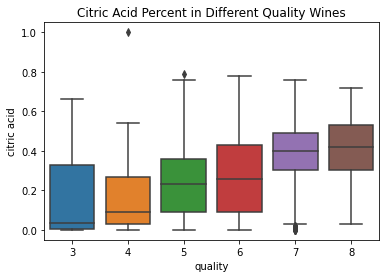

In [24]:
sns.boxplot(x='quality',y='citric acid', data=data)
plt.title("Citric Acid Percent in Different Quality Wines")

Volatile Acidity

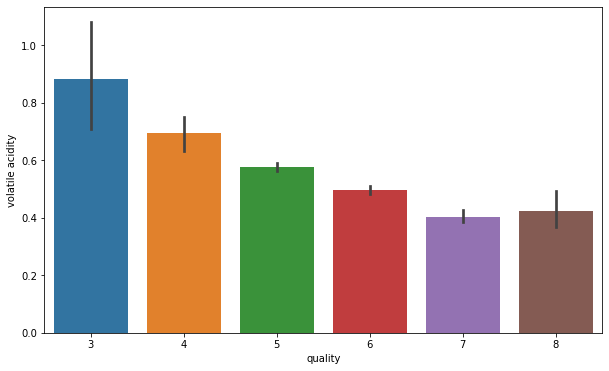

In [25]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = data)

Text(0, 0.5, 'Volatile Acidity')

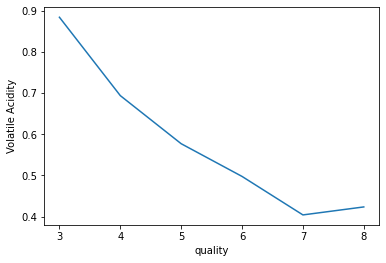

In [26]:
data.groupby('quality')['volatile acidity'].mean().plot.line()
plt.ylabel("Volatile Acidity")

Text(0.5, 1.0, 'Volatile Acidity Percent in Different Quality Wines')

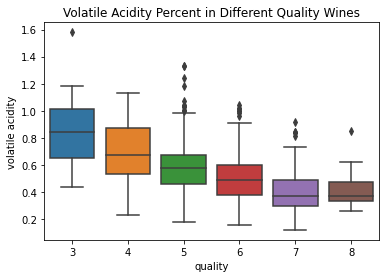

In [27]:
sns.boxplot(x='quality',y='volatile acidity', data=data)
plt.title("Volatile Acidity Percent in Different Quality Wines")

Text(0.5, 1.0, 'fixed acidity and quality')

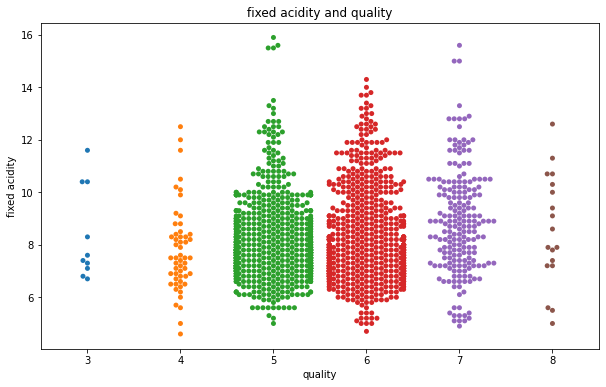

In [28]:
plt.figure(figsize=(10,6))
sns.swarmplot(x= "quality", y="fixed acidity" , data = data) 
plt.title('fixed acidity and quality')

Text(0.5, 1.0, 'fixed acidity and quality')

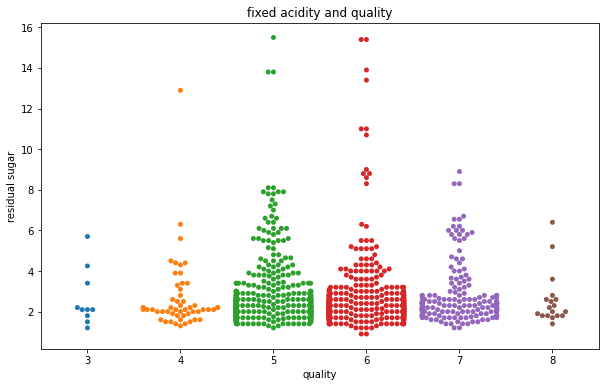

In [29]:
plt.figure(figsize=(10,6))
sns.swarmplot(x= "quality", y="residual sugar" , data = data) 
plt.title('fixed acidity and quality')

Text(0, 0.5, 'pH')

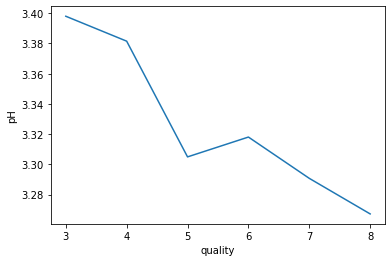

In [30]:
data.groupby('quality')['pH'].mean().plot.line()
plt.ylabel("pH")

In [31]:
collist=data.columns.values
ncol=12
nrows=10

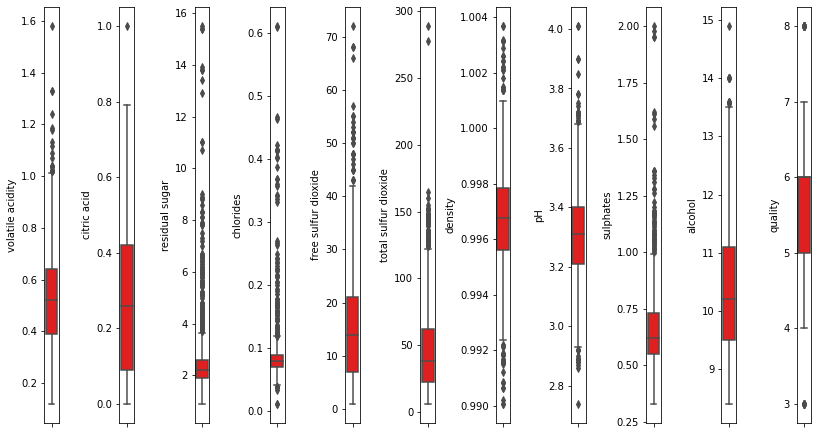

In [32]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data[collist[i]],color='red',orient='v')
    plt.tight_layout()

As we observe in above visualizations of boxplots and subplots there are some strange values in almost variables that is very far from whiskers and it is none other than outliers.
So outliers are available in this dataset.

# Now Checking Skewness in dataset

In [33]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

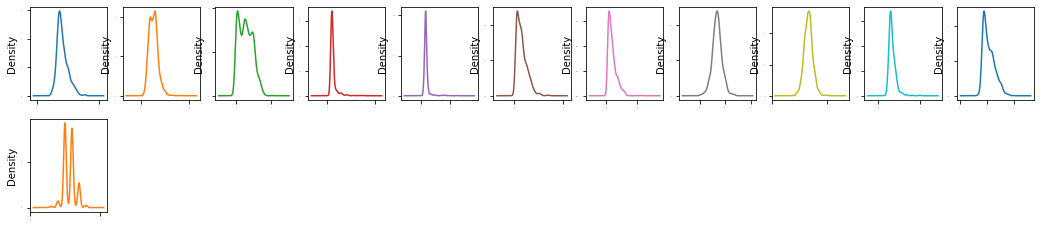

In [34]:
# multivariate analysis

data.plot(kind='density',subplots=True, layout=(6,11),sharex=False, legend=False,fontsize=1,figsize=(18,12))
plt.show()

Here we can see there are many variables that are right/positively skewed.

# Removing Outliers

In [35]:
mean=np.mean(data)
print("Mean of the dataset",mean)
std=np.std(data)
print("Standard Deviation of the dataset",std)

Mean of the dataset fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64
Standard Deviation of the dataset fixed acidity            1.740552
volatile acidity         0.179004
citric acid              0.194740
residual sugar           1.409487
chlorides                0.047051
free sulfur dioxide     10.456886
total sulfur dioxide    32.885037
density                  0.001887
pH                       0.154338
sulphates                0.169454
alcohol                  1.065334
quality                  0.807317
dtype: float64


In [36]:
z=np.abs(zscore(data))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

Lookin the code and the output above, it is difficult to say which data points is an outliers. Let's try and define a threshold
to identify an outlier.

In [37]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [38]:
# row  and column
z[15][5]

3.359038194288537

In [39]:
z[1589][3]

3.732701384742145

In [40]:
new_data=data[(z<3).all(axis=1)]
new_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [41]:
print("Shape of dataset before removing outliers",data.shape)
print("Shape of dataset after removing outliers",new_data.shape)

Shape of dataset before removing outliers (1599, 12)
Shape of dataset after removing outliers (1451, 12)


Around 150 rows are removed as outliers.

# Splitting the independent and target variable into x and y

In [42]:
x = new_data.drop("quality", axis = 1)
y = new_data["quality"]

In [43]:
# Checking skewness
x.skew()

# If you have any value for a variable positive or negative grater than 0.5 then there is skewness, you have to remove it.

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
dtype: float64

In [44]:
y.skew()

0.4078653928070539

# Removing Skewness

In [45]:
from sklearn.preprocessing import power_transform
new_data=power_transform(x)

data=pd.DataFrame(new_data,columns=x.columns)

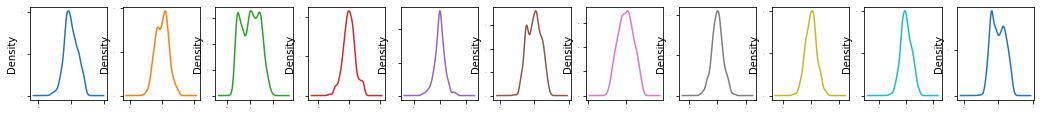

In [46]:
data.plot(kind='density',subplots=True, layout=(6,11),sharex=False, legend=False,fontsize=1,figsize=(18,12))
plt.show()

Now here i have removed skewness.

# Finding best Random_State Value

In [47]:
# Splitiing Dataset into training and test set 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrf= lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)        

Best accuracy is 0.6605504587155964 on Random_state 68


Since few independent features of dataset have major differences from other features, there is a chance that higher weightage is given to features with higher magnitude. This will impact the performance of the machine learning algorithm and obviously, we do not want our algorithm to be biassed towards one feature.
Therefore i will use standard scaler to scale my dataset so that all the features contribute equally to result.

# Using StandardScaler for Feature Scaling

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=68)
sc= StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [49]:
# after standardlization
pd.DataFrame(data, columns=x.columns)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.467878,1.055740,-1.524506,-0.610683,-0.145035,-0.241492,-0.066536,0.640791,1.360860,-0.589657,-1.120424
1,-0.170805,1.919750,-1.524506,0.649155,0.986838,1.091561,0.952517,0.061011,-0.816507,0.451524,-0.530340
2,-0.170805,1.357067,-1.245434,0.207601,0.718578,0.238587,0.624244,0.177435,-0.380977,0.220005,-0.530340
3,1.573404,-1.556675,1.444056,-0.610683,-0.207213,0.440493,0.784119,0.756049,-1.110847,-0.393177,-0.530340
4,-0.467878,1.055740,-1.524506,-0.610683,-0.145035,-0.241492,-0.066536,0.640791,1.360860,-0.589657,-1.120424
...,...,...,...,...,...,...,...,...,...,...,...
1446,-1.555136,0.519909,-0.980170,-0.374766,0.622975,1.530980,0.316130,-1.056784,0.953105,-0.393177,0.287037
1447,-1.885464,0.234578,-0.852348,0.031772,-1.120575,1.895825,0.537893,-0.926257,1.428214,0.992572,0.901563
1448,-1.451007,-0.002867,-0.666256,0.207601,-0.145035,1.353642,0.173970,-0.559962,0.746855,0.930432,0.742882
1449,-1.885464,0.766518,-0.727555,-0.374766,-0.207213,1.530980,0.316130,-0.719196,1.762437,0.666655,-0.034166


# Classification Methods

Now i will apply different different classification methods to get best model for this dataset.

1. Logistic Regression

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,predlr))
print("Confusion Matrix:",confusion_matrix(y_test,predlr))
print("Classification Report:",classification_report(y_test,predlr))

Accuracy Score: 0.6353211009174312
Confusion Matrix: [[  0   7   4   0   0]
 [  1 141  54   0   0]
 [  2  43 114  18   0]
 [  0   2  25  22   0]
 [  0   0   2   1   0]]
Classification Report:               precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.73      0.72      0.72       196
           6       0.57      0.64      0.61       177
           7       0.54      0.45      0.49        49
           8       0.00      0.00      0.00         3

    accuracy                           0.64       436
   macro avg       0.37      0.36      0.36       436
weighted avg       0.62      0.64      0.63       436



2 Support Vector Classifier

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,predsvc))
print("Confusion Matrix:",confusion_matrix(y_test,predsvc))
print("Classification Report:",classification_report(y_test,predsvc))

Accuracy Score: 0.6651376146788991
Confusion Matrix: [[  0  10   1   0   0]
 [  0 159  35   2   0]
 [  0  55 113   9   0]
 [  0   2  29  18   0]
 [  0   0   3   0   0]]
Classification Report:               precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.70      0.81      0.75       196
           6       0.62      0.64      0.63       177
           7       0.62      0.37      0.46        49
           8       0.00      0.00      0.00         3

    accuracy                           0.67       436
   macro avg       0.39      0.36      0.37       436
weighted avg       0.64      0.67      0.65       436



3. Decision Tree Classifier

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,preddtc))
print("Confusion Matrix:",confusion_matrix(y_test,preddtc))
print("Classification Report:",classification_report(y_test,preddtc))

Accuracy Score: 0.6169724770642202
Confusion Matrix: [[  0   7   4   0   0]
 [  5 136  47   7   1]
 [  3  46 104  23   1]
 [  0   4  14  29   2]
 [  0   0   1   2   0]]
Classification Report:               precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.70      0.69      0.70       196
           6       0.61      0.59      0.60       177
           7       0.48      0.59      0.53        49
           8       0.00      0.00      0.00         3

    accuracy                           0.62       436
   macro avg       0.36      0.37      0.37       436
weighted avg       0.62      0.62      0.62       436



4. Random Forest Classifier

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,predrf))
print("Confusion Matrix:",confusion_matrix(y_test,predrf))
print("Classification Report:",classification_report(y_test,predrf))

Accuracy Score: 0.6926605504587156
Confusion Matrix: [[  0   9   2   0   0]
 [  0 152  43   1   0]
 [  0  37 125  15   0]
 [  0   3  20  25   1]
 [  0   0   2   1   0]]
Classification Report:               precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.76      0.78      0.77       196
           6       0.65      0.71      0.68       177
           7       0.60      0.51      0.55        49
           8       0.00      0.00      0.00         3

    accuracy                           0.69       436
   macro avg       0.40      0.40      0.40       436
weighted avg       0.67      0.69      0.68       436



# Comparison between classifiers

In [54]:
models={'Models':['Logistic Regression','Support Vector Classifier','Decision Tree','Random Forest'],
       'Accuracy':[accuracy_score(y_test,predlr),accuracy_score(y_test,predsvc),accuracy_score(y_test,preddtc),
                   accuracy_score(y_test,predrf)]}
model_acc = pd.DataFrame(models,index = ['1','2','3','4',], 
                     columns = ['Models','Accuracy'])
model_acc


,Models,Accuracy
1,Logistic Regression,0.635321
2,Support Vector Classifier,0.665138
3,Decision Tree,0.616972
4,Random Forest,0.692661


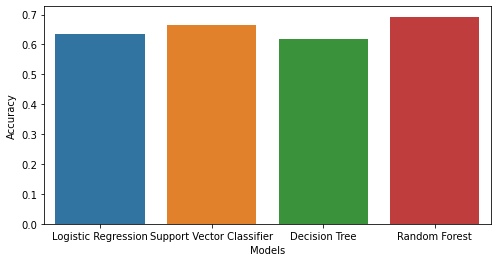

In [55]:
fig = plt.figure(figsize = (8,4))
sns.barplot(x = 'Models', y = 'Accuracy', data = model_acc)

We are getting highest accuracy with RandomForestClassifier(71%) but it can be due to overfitting also so we will check cross validation score.

# Cross Validation

In [56]:
from sklearn.model_selection import cross_val_score
model=[lr,svc,dtc,rf]

for m in model:
    score=cross_val_score(m,x,y, cv=5)
    print("Cross validation score of:",m)
    print(score.mean())

Cross validation score of: LogisticRegression()
0.5810072283445906
Cross validation score of: SVC()
0.49961843820357854
Cross validation score of: DecisionTreeClassifier()
0.4658869534305012
Cross validation score of: RandomForestClassifier()
0.5775613224315677


In [57]:
models={'Models':['Logistic Regression','Support Vector Classifier','Decision Tree','Random Forest'],
       'Accuracy':[accuracy_score(y_test,predlr),accuracy_score(y_test,predsvc),accuracy_score(y_test,preddtc),
                   accuracy_score(y_test,predrf)],
       "Cross-Val":[cross_val_score(lr,x,y, cv=5).mean(),cross_val_score(svc,x,y, cv=5).mean(),cross_val_score(dtc,x,y, cv=5).mean(),
                   cross_val_score(rf,x,y, cv=5).mean()]}
model_acc = pd.DataFrame(models,index = ['1','2','3','4'], 
                     columns = ['Models','Accuracy','Cross-Val'])
model_acc

,Models,Accuracy,Cross-Val
1,Logistic Regression,0.635321,0.581007
2,Support Vector Classifier,0.665138,0.499618
3,Decision Tree,0.616972,0.457606
4,Random Forest,0.692661,0.576194


As here i can see that LogisticRegression has very less difference between Accuracy and Corss-Val. So this model is best here

# Hyper Parameter Tunning

In [68]:
from sklearn.model_selection import GridSearchCV
parameters= {'penalty':['l1','l2','elastinet'],
            'C':[100,10,1.0,0.1,0.01],}

In [69]:
GCV=GridSearchCV(LogisticRegression(),parameters,cv=5)

In [70]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elastinet']})

In [71]:
GCV.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [72]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [73]:
accuracy_score(y_test,GCV_pred)

0.6353211009174312

# Saving the best model now

In [74]:
import joblib
joblib.dump(lr,'Wine_Model_LogisticRegression.obj')


['Wine_Model_LogisticRegression.obj']